<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:
<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
K(huruf K sebagai jumlah kategori)-nearest neighbors adalah algoritma Supervised Learning dimana algoritma ini bekerja dengan cara mengklasifikasikan suatu data berdasarkan K-tetangga (baca: data) terdekat sehingga data tersebut dapat ditentukan kecenderungannya berdasarkan tetangga terdekatnya. Prosesnya adalah:

a. Menentukan jumlah tetangga yg akan kita perhitungkan (K), misalnya kita tentukan 3 tetangga terdekat (K = 3).

b. Menghitung jarak setiap tetangga terhadap objek tersebut, lalu urutkan hasilnya berdasarkan jarak, mulai dari yang terkecil ke yang terbesar.

c. Ambil 3 tetangga (K) yg paling dekat, lalu data tersebut akan dikelompokkan berdasarkan kedekatannya terhadap K.

2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

a. Rentan terhadap variabel yang non-informatif
kNN tetap tidak dapat mengetahui variabel mana yang signifikan dalam klasifikasi dan mana yang tidak. Hal ini dikarenakan dua instance kelas biru bisa saja terklasifikasi dengan salah, karena kedua instance tersebut dekat dengan salah satu instance kelas

b. Rentan terhadap perbedaan rentang variabel
Dalam perhitungan jarak antar-instance, kNN menganggap semua variabel setara atau sama penting. 

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

Uniform Score
 [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666]
Distance Score
 [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


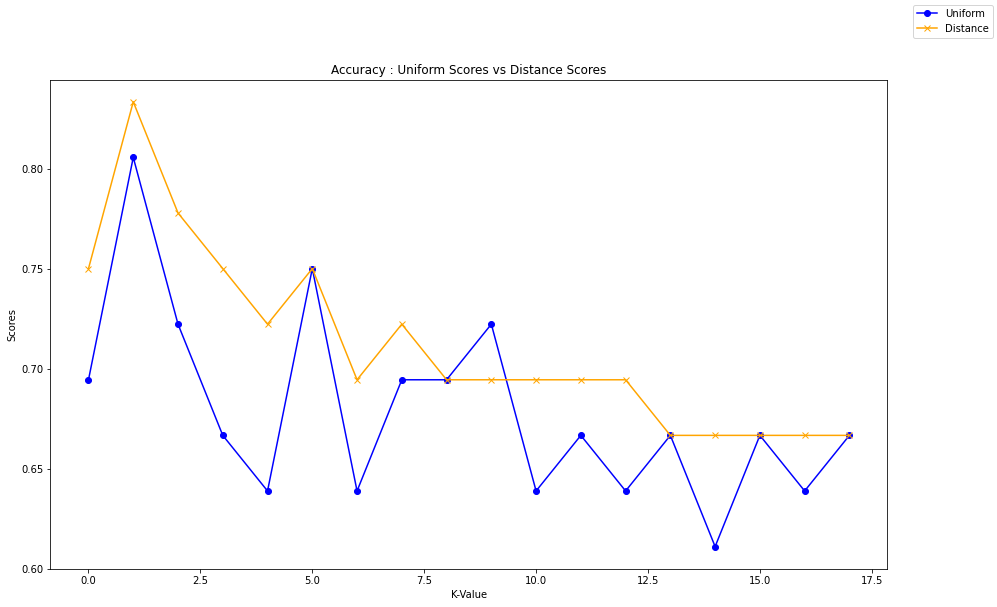

In [ ]:
from sklearn.datasets import load_wine
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

from sklearn.neighbors import KNeighborsClassifier

def knn_predict(k, weight):
    model = KNeighborsClassifier(n_neighbors = k, weights = weight)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

ks = np.arange(2,20)
weights = ['uniform', 'distance']
n_neighbors = ['k']

acc_score = np.zeros((len(weights), len(n_neighbors)))

list_uniform_score=[]
list_distance_score=[]

for k, weight in product(ks,weights):
    score = knn_predict(k=k, weight=weight)
    if(weight == 'uniform'):
        list_uniform_score.append(score)
    elif(weight == 'distance'):
        list_distance_score.append(score)
        
print('Uniform Score\n', list_uniform_score)
print('Distance Score\n', list_distance_score)
    
fig, ax = plt.subplots(figsize=(15, 9))
ax.set_title('Accuracy : Uniform Scores vs Distance Scores')
ax.set_xlabel('K-Value')
ax.set_ylabel('Scores')
ax.plot(list_uniform_score, label='Uniform', color='blue',marker='o')
ax.plot(list_distance_score, label='Distance', color='orange',marker='x')
fig.legend()
plt.show()



Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

model = LinearRegression()
model.fit(X,y)

r_sq = model.score(X, y)
print('coefficient of determination:', model.coef_) 
print('intercept:', model.intercept_)


coefficient of determination: [ 1.5 -5.   9.  10. ]
intercept: 0.5000000016247981
